In [1]:
import os
import re
import json

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

import pandas as pd

test_cls_filter = True
wrong_rec = False

# root_dir = "datasets/quest2/openhand"
# root_dir = "datasets/quest2/quest_noshake_files"
# root_dir = "datasets/nrealX/test2_2023-02-27-12-54-23/predict_data"
# root_dir = "datasets/nrealX/UpRightStaticHand_test2_2023-03-01-16-50-30/predicted_data"
# root_dir = "datasets/quest2/files"
# root_dir = "datasets/nrealX/test2_2023-03-01-17-36-44/predicted_data"

# root_dir = "datasets/nrealX/LeftStaticHand/front_test2_2023-03-02-17-27-17/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/front_test2_2023-03-02-17-29-04/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/up_test2_2023-03-02-16-53-14/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/up_test2_2023-03-02-16-46-08/hand_record_data"; wrong_rec=True  # key analyse
# root_dir = "datasets/nrealX/LeftStaticHand/below_test2_2023-03-02-16-54-57/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/below_test2_2023-03-02-17-03-11/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/right_test2_2023-03-02-16-19-21/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/right_test2_2023-03-02-16-20-42/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/LeftStaticHand/left_test2_2023-03-02-16-27-53/hand_record_data"
# root_dir = "datasets/nrealX/LeftStaticHand/left_test2_2023-03-02-16-36-38/hand_record_data"


# root_dir = "datasets/nrealX/RightStaticHand/front_test2_2023-03-02-15-18-20/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/front_test2_2023-03-02-15-33-18/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/Uptest2_2023-03-02-11-32-50/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/Uptest2_2023-03-02-15-13-13/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/below_test2_2023-03-02-15-48-41/hand_record_data"  # case in meeting
# root_dir = "datasets/nrealX/RightStaticHand/below_test2_2023-03-02-15-41-31/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/left_test2_2023-03-02-15-58-46/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/RightStaticHand/left_test2_2023-03-02-16-01-53/hand_record_data"; wrong_rec=True
# root_dir = "datasets/nrealX/RightStaticHand/right_test2_2023-03-02-16-09-56/hand_record_data"
# root_dir = "datasets/nrealX/RightStaticHand/right_test2_2023-03-02-16-11-18/hand_record_data"  # case in meeting


# root_dir = "datasets/nrealX/0313RightStaticHand/test2_2023-03-13-14-22-41/hand_record_data"
# root_dir = "datasets/nrealX/0313RightStaticHand/test2_2023-03-13-14-22-41/predicted_data"

root_dir = "datasets/nrealX/0313RightStaticHand2/test2_2023-03-13-15-01-26/hand_record_data"
# root_dir = "datasets/nrealX/0313RightStaticHand2/test2_2023-03-13-15-01-26/predicted_data"

# root_dir = "datasets/nrealX/RightStaticHand/front_test2_2023-03-02-15-18-20/predicted_data"


# root_dir = "datasets/nrealX/LeftStaticHand/left_test2_2023-03-02-16-27-53/hand_record_data"
save_dir = root_dir.replace("datasets", "outputs")
os.makedirs(save_dir, exist_ok=True)

if 'predicted' in root_dir:
    print('test predict')
    test_cls_filter = False
else:
    print('test filter')

if 'Left' in root_dir:
    test_left = True
elif 'Right' in root_dir:
    test_left = False
else:
    raise KeyError

if wrong_rec:
    test_left = not test_left


test filter


In [2]:
# get files and sorted by timestamp

file_list = os.listdir(root_dir)

if test_cls_filter:
    file_list = list(filter(lambda x: ("inference" in x), file_list))
else:
    file_list = list(filter(lambda x: ("predicted" in x), file_list))
file_list.sort()
len_file = len(file_list)
print(len_file)

3678


In [3]:
gesture_list = dict()
is_tracked = dict()
keypoints = dict()
orientation = dict()

time_list = []
gesture_list["left"] = []
gesture_list["right"] = []
is_tracked["left"] = []
is_tracked["right"] = []
keypoints["left"] = []
keypoints["right"] = []
orientation["left"] = []
orientation["right"] = []

start_time = int(file_list[0].split('_')[1])

In [4]:

for index, filename in enumerate(file_list):
    
    timestamp_ns = int(filename.split('_')[1])
    
    # rel_time_sec = (timestamp_ns - start_time) / 1e9
    rel_time_sec = (timestamp_ns - start_time)*0.033333333
    
    with open(os.path.join(root_dir, filename), 'r') as f:
        data = json.load(f)
    
    time_list.append(rel_time_sec)
    # gesture_list["left"].append(data["lefthand"]["gesture_result"])
    # gesture_list["right"].append(data["righthand"]["gesture_result"])
    
    left_tracked, right_tracked = data["leftright_hand_status"]
    is_tracked["left"].append(left_tracked)
    is_tracked["right"].append(right_tracked)

    # is_tracked["left"].append(data["lefthand"]["is_tracked"])
    # is_tracked["right"].append(data["righthand"]["is_tracked"])
    # if data["lefthand"]["is_tracked"]:
    # print(filename)
    if left_tracked:
        if test_cls_filter:
            # kpts = np.array(data["mid_inference"]["09_worldmano"]["lefthand"]).reshape(23,3)
            # kpts = np.array(data["mid_inference"]["04_lift"]["lefthand"]).reshape(21,3)
            # kpts = np.array(data["mid_inference"]["02_rsn"]["righthand_leftcam"]).reshape(21,2)
            # kpts = np.array(data["mid_inference"]["00_detect"]["lefthand_leftcam"]).reshape(4,1).repeat(3,axis=1)
            # kpts = np.concatenate([
            #     np.array(data["mid_inference"]["02_rsn"]["lefthand_leftcam"]).reshape(21,2),
            #     np.zeros((21,1))], axis=1)
            # kpts = np.array(data["mid_inference"]["05_mano"]["lefthand"]).reshape(23,3)
            kpts = np.array(data["mid_inference"]["07_transferworld"]["headpose"]).reshape(7,1).repeat(3,axis=1)


        else:
            kpts = np.array(data["predicted"]["lefthand"]["keypoints"]).reshape(23,3)
        keypoints["left"].append(kpts)
    else:
        # ocupy a index place
        keypoints["left"].append(None)
        
    # if data["righthand"]["is_tracked"]:
    if right_tracked:
        if test_cls_filter:
            # kpts = np.array(data["mid_inference"]["09_worldmano"]["righthand"]).reshape(23,3)
            # kpts = np.array(data["mid_inference"]["04_lift"]["righthand"]).reshape(21,3)
            # kpts = np.array(data["mid_inference"]["02_rsn"]["righthand_leftcam"]).reshape(21,2)
            # kpts = np.array(data["mid_inference"]["00_detect"]["righthand_leftcam"]).reshape(4,1).repeat(3,axis=1)
            # kpts = np.concatenate([
            #     np.array(data["mid_inference"]["02_rsn"]["righthand_leftcam"]).reshape(21,2),
            #     np.zeros((21,1))], axis=1)
            # kpts = np.array(data["mid_inference"]["05_mano"]["righthand"]).reshape(23,3)
            kpts = np.array(data["mid_inference"]["07_transferworld"]["headpose"]).reshape(7,1).repeat(3,axis=1)


        else:
            kpts = np.array(data["predicted"]["righthand"]["keypoints"]).reshape(23,3)
        keypoints["right"].append(kpts)
    else:
        #ocupy a index place
        keypoints["right"].append(None)
    

righthand 0 mean:  [-0.02553039 -0.02553039 -0.02553039]
righthand 0 std:  [7.54566783e-05 7.54566783e-05 7.54566783e-05]
righthand 0 abs mean err:  [6.20748476e-05 6.20748476e-05 6.20748476e-05]
time_list_tmp: [61.33333272, 61.366666053, 61.399999386, 61.433332719, 61.466666052, 61.499999385, 61.533332718, 61.566666051, 61.599999384, 61.633332717, 61.666666049999996, 61.699999383, 61.733332716, 61.766666049, 61.799999382, 61.833332715, 61.866666048, 61.899999381, 61.933332714, 61.966666047, 61.99999938, 62.033332713, 62.066666046, 62.099999378999996, 62.133332712, 62.166666045, 62.199999378, 62.233332711, 62.266666044, 62.299999377, 62.33333271, 62.366666043, 62.399999376, 62.433332709, 62.466666042, 62.499999375, 62.533332707999996, 62.566666041, 62.599999374, 62.633332707, 62.66666604, 62.699999373, 62.733332706, 62.766666039, 62.799999372, 62.833332705, 62.866666038, 62.899999371, 62.933332704, 62.966666036999996, 62.99999937, 63.033332703, 63.066666036, 63.099999369, 63.133332702,

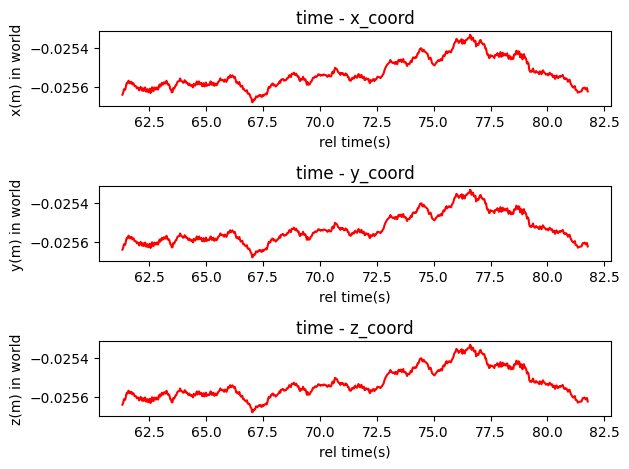

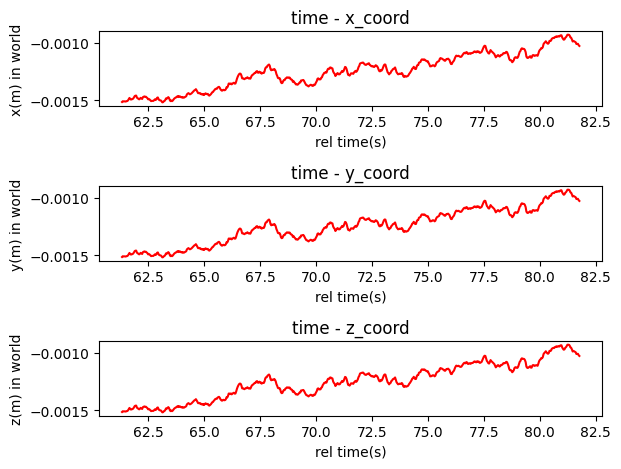

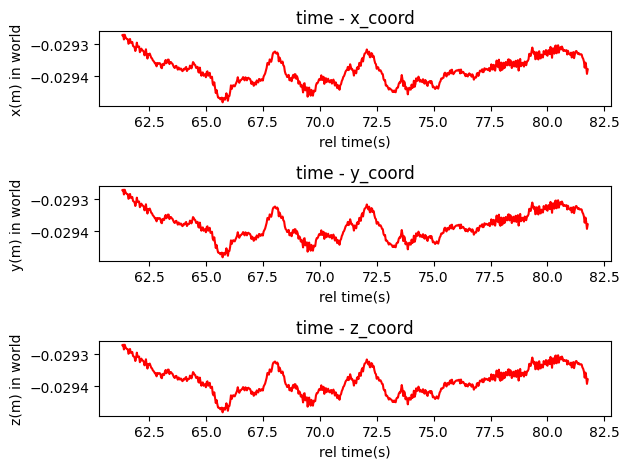

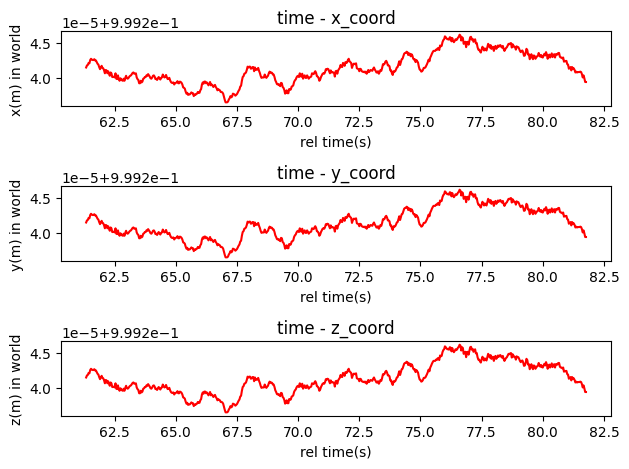

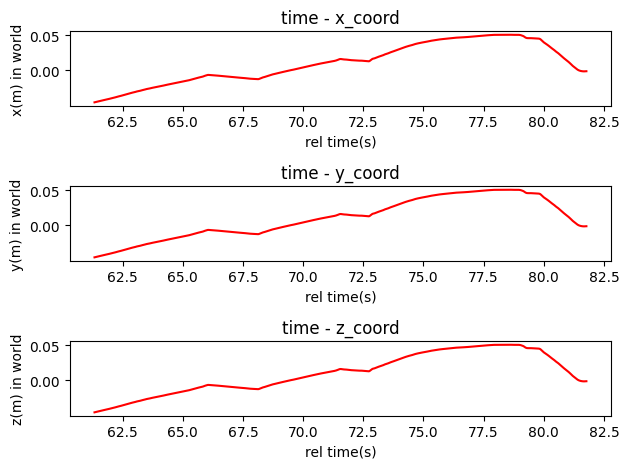

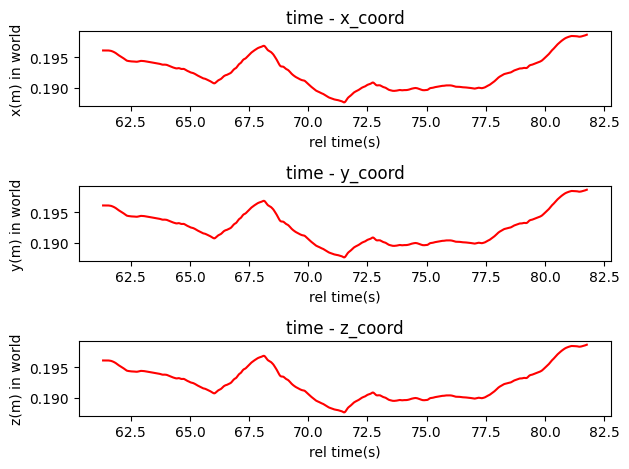

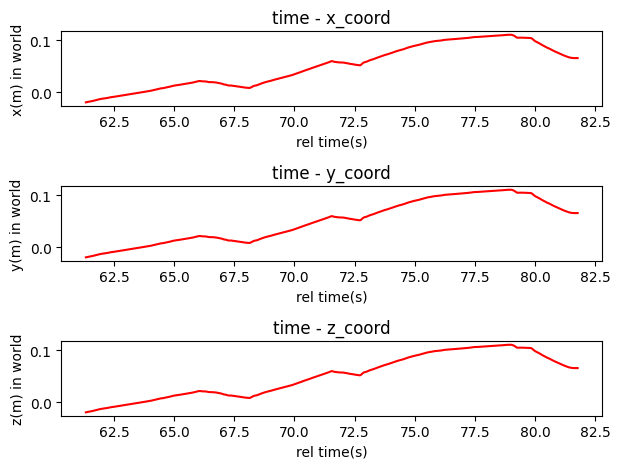

In [5]:
# compute mean, var, abserr of right hand keypoint index 21(center), finally plot x axis curve
start_time = int(len_file/2)
end_time = int(len_file*2/3)

# start_time = 10
# end_time = len_file-10

pd_index_list = []

pd_data = {}
pd_data["x_mean"] = []
pd_data["x_std"] = []
pd_data["x_abs_mean_err"] = []
pd_data["y_mean"] = []
pd_data["y_std"] = []
pd_data["y_abs_mean_err"] = []
pd_data["z_mean"] = []
pd_data["z_std"] = []
pd_data["z_abs_mean_err"] = []
pd_data["space_abs_mean_err"] = []
pd_data["pk_pk_x"] = []
pd_data["pk_pk_y"] = []
pd_data["pk_pk_z"] = []
pd_data["pk_pk_angle_x"] = []
pd_data["pk_pk_angle_y"] = []
pd_data["pk_pk_angle_z"] = []

for index in range(7):
    time_list_tmp = []
    keypoints_tmp = []
    orientations_tmp = []
    
    pd_index_list.append(f"point {index}")

    if test_left:
        for i in range(start_time, end_time):
            # if is_tracked["right"][i]:
            if is_tracked["left"][i]:
                time_list_tmp.append(time_list[i])
                # keypoints_tmp.append(keypoints["right"][i][index])
                keypoints_tmp.append(keypoints["left"][i][index])
                
                # r = R.from_quat(orientation["right"][i][index])
                # orientations_tmp.append(r.as_euler('xyz', degrees=True))
                # orientations_tmp.append(keypoints["right"][i][index])
    
    else:
        for i in range(start_time, end_time):
            if is_tracked["right"][i]:
            # if is_tracked["left"][i]:
                time_list_tmp.append(time_list[i])
                keypoints_tmp.append(keypoints["right"][i][index])
                # keypoints_tmp.append(keypoints["left"][i][index])
                
                # r = R.from_quat(orientation["right"][i][index])
                # orientations_tmp.append(r.as_euler('xyz', degrees=True))
                # orientations_tmp.append(keypoints["right"][i][index])
    
    keypoints_np = np.array(keypoints_tmp)
    # orientations_np = np.array(orientations_tmp)
    
    mean = np.mean(keypoints_np, axis=0)
    std = np.std(keypoints_np, axis=0)
    abs_mean_err = np.mean(np.abs(keypoints_np-mean), axis=0)
    
    pd_data["x_mean"].append(mean[0])
    pd_data["x_std"].append(std[0])
    pd_data["x_abs_mean_err"].append(abs_mean_err[0])
    pd_data["y_mean"].append(mean[1])
    pd_data["y_std"].append(std[1])
    pd_data["y_abs_mean_err"].append(abs_mean_err[1])
    pd_data["z_mean"].append(mean[2])
    pd_data["z_std"].append(std[2])
    pd_data["z_abs_mean_err"].append(abs_mean_err[2])
    pd_data["space_abs_mean_err"].append(np.sqrt(abs_mean_err[0]**2 + abs_mean_err[1]**2 + abs_mean_err[2]**2))
    
    pk_pk_pos = np.max(keypoints_np, axis = 0) - np.min(keypoints_np, axis = 0)
    pd_data["pk_pk_x"].append(pk_pk_pos[0])
    pd_data["pk_pk_y"].append(pk_pk_pos[1])
    pd_data["pk_pk_z"].append(pk_pk_pos[2])
    
    # pk_pk_ori = np.max(orientations_np, axis = 0) - np.min(orientations_np, axis = 0)
    # pd_data["pk_pk_angle_x"].append(pk_pk_ori[0])
    # pd_data["pk_pk_angle_y"].append(pk_pk_ori[1])
    # pd_data["pk_pk_angle_z"].append(pk_pk_ori[2])
    
    print("righthand {} mean: ".format(index), mean)
    print("righthand {} std: ".format(index), std)
    print("righthand {} abs mean err: ".format(index), abs_mean_err)
    
    fig = plt.figure()
    
    plt.subplot(3, 1, 1)
    plt.title("time - x_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 0], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("x(m) in world")
    
    plt.subplot(3, 1, 2)
    plt.title("time - y_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 1], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("y(m) in world")
    
    plt.subplot(3, 1, 3)
    plt.title("time - z_coord")
    plt.plot(time_list_tmp, keypoints_np[:, 2], "r")
    plt.xlabel("rel time(s)")
    plt.ylabel("z(m) in world")
    
    fig.align_labels()
    plt.tight_layout()
    
    plt.savefig(f"{save_dir}/point_{index}.png")
    print(f"time_list_tmp: {time_list_tmp}")





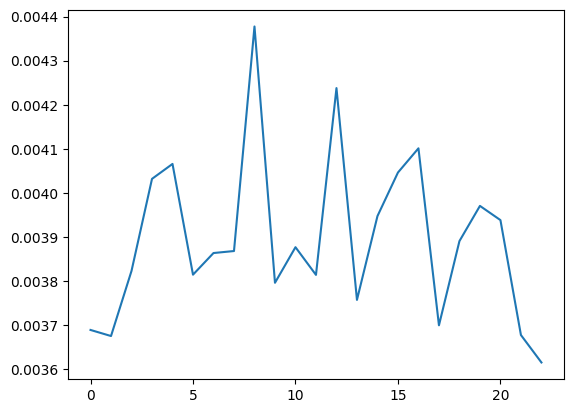

In [31]:
plt.plot(range(23), pd_data["space_abs_mean_err"])

In [32]:
np.argsort(pd_data["space_abs_mean_err"])[::-1]

array([ 8, 12, 16,  4, 15,  3, 19, 14, 20, 18, 10,  7,  6,  2,  5, 11,  9,
       13, 17,  0, 21,  1, 22])

In [33]:
print(np.array(pd_data["pk_pk_x"]).mean())
print(np.array(pd_data["pk_pk_y"]).mean())
print(np.array(pd_data["pk_pk_z"]).mean())

0.0022262341302374134
0.00382960377180058
0.023453440355217976
